In [19]:
import csv
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import networkx as nx
from pprint import pprint
from collections import defaultdict

In [12]:
# load results csvs
chain_results_path = "./data/chain_fanout/chc10s_results_summary.csv" 
fanout_results_path = "./data/chain_fanout/foc10s_results_summary.csv" 

chain = pd.read_csv(chain_results_path)
chain = chain.sort_values(by=["rootcause"])

fanout = pd.read_csv(fanout_results_path)
fanout = fanout.sort_values(by=["rootcause"])
# pprint(chain)
# pprint(fanout)

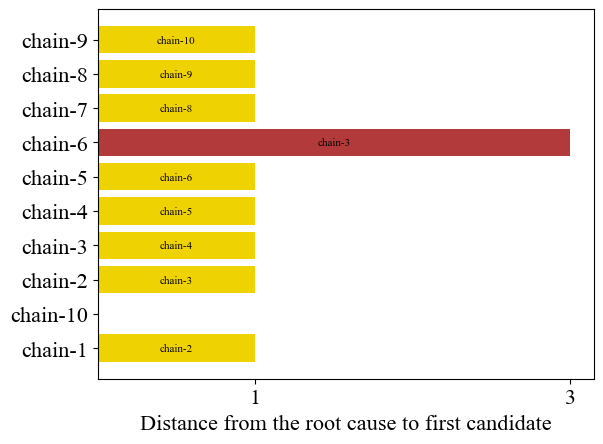

In [72]:
# calculate the distance between the root cause and service ranked first for chain
dist_rc = []
first_candidates = []
for _, injection in chain.iterrows():
    rootcause = injection["rootcause"]
    rootcause_depth = int(rootcause.split("-")[1])
    pattern = injection["tracerca_patterns"]
    first_candidate = pattern.split(",")[0]
    first_candidate_depth = int(first_candidate.split("-")[1])
    
    dist = abs(first_candidate_depth - rootcause_depth)
    dist_rc.append(dist)
    first_candidates.append(first_candidate)
    
chain["dist. from rootcause"] = dist_rc

bar_colors = list(map(lambda x: "#B33A3A" if x == -1 else ("#AFE1AF" if x == 1 else "#EED202") ,chain["tracerca_rank"]))

fontsize = 16

plt.rcParams['font.family'] = "Times New Roman"
plt.rcParams['font.size'] = fontsize

bar = plt.barh(chain["rootcause"], chain["dist. from rootcause"], color=bar_colors)
plt.xticks([1.0, 3.0])
plt.xlabel("Distance from the root cause to first candidate")

plt.bar_label(bar, labels=['%s' % s if i != 1 else "" for i, s in enumerate(first_candidates)], fontsize=8, label_type="center")

plt.savefig("./5_3-chain_distance.png", bbox_inches="tight")

plt.show()

['gateway', 'chain-9', 'chain-1', 'chain-2', 'chain-2', 'chain-3', 'chain-3', 'chain-7', 'chain-7', 'chain-5']


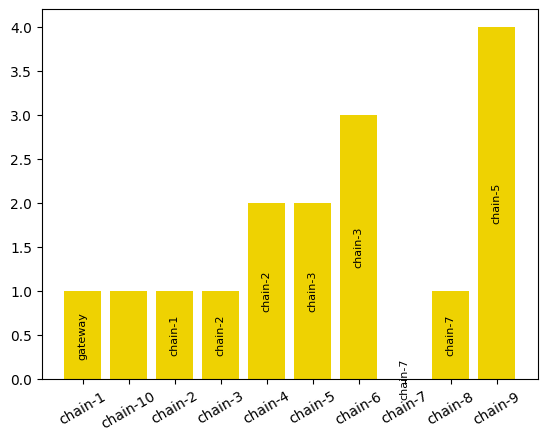

In [46]:
dist_rc = []
first_candidates = []
for _, injection in chain.iterrows():
    rootcause = injection["rootcause"]
    
    rootcause_depth = int(rootcause.split("-")[1])
    pattern = injection["microrca_patterns"]
    first_candidate = pattern.split(",")[0]
    if first_candidate == "gateway":
        first_candidate_depth = 0
    else:
        first_candidate_depth = int(first_candidate.split("-")[1])
    
    dist = abs(first_candidate_depth - rootcause_depth)
    dist_rc.append(dist)
    first_candidates.append(first_candidate)
    
print(first_candidates)
chain["dist. from rootcause"] = dist_rc

bar_colors = list(map(lambda x: "#B33A3A" if x == -1 else ("#AFE1AF" if x == 1 else "#EED202") ,chain["microrca_rank"]))


bar = plt.bar(chain["rootcause"], chain["dist. from rootcause"], color=bar_colors)
plt.xticks(rotation=30)

plt.bar_label(bar, labels=['%s' % s if i != 1 else "" for i, s in enumerate(first_candidates)], fontsize=8, rotation=90, label_type="center")

plt.show()

In [40]:
# calculate the median of the depth for microrca on chain
dist_rc = []
first_candidates = []
for _, injection in chain.iterrows():
    rootcause = injection["rootcause"]
    rootcause_depth = int(rootcause.split("-")[1])
    pattern = injection["microrca_patterns"]
    first_candidate = pattern.split(",")[0]
    first_candidates.append(first_candidate)
    
print(first_candidates)


['gateway', 'chain-9', 'chain-1', 'chain-2', 'chain-2', 'chain-3', 'chain-3', 'chain-7', 'chain-7', 'chain-5']


In [60]:
# reshape csv
patterns_short_tr = [] 
patterns_short_mr = []

for _, injection in chain.iterrows():
    pattern_tr = injection["tracerca_patterns"]
    pattern_tr = pattern_tr.split(",")
    pattern_tr = "  ".join(pattern_tr[0:3])
    patterns_short_tr.append(pattern_tr)
    pattern_mr = injection["microrca_patterns"]
    pattern_mr = pattern_mr.split(",")
    pattern_mr = "  ".join(pattern_mr[0:3])
    patterns_short_mr.append(pattern_mr)
    
chain_detail = chain[["rootcause", "tracerca_rank", "microrca_rank"]]
chain_detail["tracerca_pattern"] = patterns_short_tr
chain_detail["microrca_pattern"] = patterns_short_mr
chain_detail.to_csv("./data/chain_fanout/chain_detail.csv", index=False)


/var/folders/lb/04ff_k_17_b433_wm677wttw0000gn/T/ipykernel_81027/3560049872.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chain_detail["tracerca_pattern"] = patterns_short_tr
/var/folders/lb/04ff_k_17_b433_wm677wttw0000gn/T/ipykernel_81027/3560049872.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chain_detail["microrca_pattern"] = patterns_short_mr


In [61]:
patterns_short_tr = [] 
patterns_short_mr = []

for _, injection in fanout.iterrows():
    pattern_tr = injection["tracerca_patterns"]
    pattern_tr = pattern_tr.split(",")
    pattern_tr = "  ".join(pattern_tr[0:3])
    patterns_short_tr.append(pattern_tr)
    pattern_mr = injection["microrca_patterns"]
    pattern_mr = pattern_mr.split(",")
    pattern_mr = "  ".join(pattern_mr[0:3])
    patterns_short_mr.append(pattern_mr)
    
fanout_detail = fanout[["rootcause", "tracerca_rank", "microrca_rank"]]
fanout_detail["tracerca_pattern"] = patterns_short_tr
fanout_detail["microrca_pattern"] = patterns_short_mr
fanout_detail.to_csv("./data/chain_fanout/fanout_detail.csv", index=False)

/var/folders/lb/04ff_k_17_b433_wm677wttw0000gn/T/ipykernel_81027/717006553.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fanout_detail["tracerca_pattern"] = patterns_short_tr
/var/folders/lb/04ff_k_17_b433_wm677wttw0000gn/T/ipykernel_81027/717006553.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fanout_detail["microrca_pattern"] = patterns_short_mr
